In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use("ggplot")

In [17]:
data = pd.read_csv("BreastCancer_data.csv")
data = data#[data.columns[:7]]
# data.columns

In [ ]:
class KNN_BOY:
    
    def __init__(self, data, label = False, exemptions = []):
        
        if not label or not isinstance(label, str):
            raise ValueError("Dataset Label must be provided, and must be string.")
            
        self.label = label
        self.data = data
        self.k = int(data.shape[0] * 0.05) # 5 PERCENT OF DATASET LENGTH AS ORIGINAL K VALUE
        self.best_feature_combo = False
        self.exemptions = exemptions + [self.label]
        
    def get_most_occuring(self, items, target_index):
        values = dict()
        target_index = 2

        for item in items:

            if item[target_index] in values.keys():
                values[item[target_index]] += 1
            else:
                values[item[target_index]] = 1

        result_list = list(values.items())
        result_list.sort(key = lambda value: value[1], reverse = True)
        result = result_list[0]
        return result

    def knn_predictor(self, data, m = 0, n = 0, k = False):
        
        if k == False:
            k = self.k
        else:
            k = k
            
        result_list = []
        m = [m]
        n = [n]

        for point in data:
            pseudo_m = m.copy()
            pseudo_n = n.copy()

            pseudo_m.append(point[0])
            pseudo_n.append(point[1])

            a = abs(pseudo_m[1] - pseudo_m[0])
            b = abs(pseudo_n[1] - pseudo_n[0])

            p_q_dist = (a**2 + b**2) ** 0.5
            point = list(point)
            point.append(p_q_dist)
            result_list.append(point)

        result_list.sort(key = lambda x: x[3])
        closest_distance = result_list[0:k]

        return self.get_most_occuring(closest_distance, 2)
    
    def get_best_feature_combo(self):
        
        if self.best_feature_combo:
            return self.best_feature_combo
        
        feature_combo_accuracies = []

        for x_axis in self.data.columns:

            if x_axis in self.exemptions:
                continue

            for y_axis in data.columns:
                

                if y_axis in self.exemptions:
                    continue
                
                print(x_axis, y_axis)

                data_selection = self.data[[x_axis, y_axis, self.label]].values
                test_values = self.data.iloc[0:30][[x_axis, y_axis, self.label]].values
                test_values = list(test_values )


                predictions = []
                accuracy = {"correct":0, "wrong":0, "accuracy": 0}


                for datapoint in test_values:
                    prediction = self.knn_predictor(data = data_selection, m = datapoint[0], n = datapoint[1], k = self.k)
                    actual = datapoint[2]


                    if actual == prediction[0]:
                        accuracy["correct"] += 1
                    elif actual != prediction[0]:
                        accuracy["wrong"] += 1

                accuracy["accuracy"] = (accuracy["correct"]/len(test_values))*100
                feature_combo_accuracies.append([accuracy, [y_axis, x_axis]])
                
        feature_combo_accuracies.sort(key = lambda accuracy: accuracy[0]["accuracy"])
        best_feature_combo = feature_combo_accuracies[-1]

        self.best_feature_combo = best_feature_combo

        return self.best_feature_combo
    
    def plot_k_tuning(self, tuning_data):
            
        print("PLOTTING")

        predictions = np.array(tuning_data)
        plt.plot(predictions[:,0], predictions[:,1], label = "Accuracy")
        plt.xlabel("K-Neighbors")
        plt.ylabel("Accuracy Value")
        plt.title("Accuracy Progression Plot")
        plt.legend()
        plt.show()
    
    def optimize_k(self):
        
        predictions = []

        data_selection = self.data[[self.best_feature_combo[1][0], self.best_feature_combo[1][1], self.label]].values
        test_values = self.data.iloc[0:30][[self.best_feature_combo[1][0], self.best_feature_combo[1][1], self.label]].values
        test_values = list(test_values )
#         print(self.best_feature_combo[1][0], self.best_feature_combo[1][1])

        for k in range(2, 100):
            accuracy = {"correct":0, "wrong":0, "accuracy": 0}

            for datapoint in test_values:
#                 print(datapoint)
                prediction = self.knn_predictor(data = data_selection, m = datapoint[0], n = datapoint[1], k = k)
#                 print(data_selection, datapoint[0], datapoint[1], self.k)
                actual = datapoint[2]

                if actual == prediction[0]:
                    accuracy["correct"] += 1
                elif actual != prediction[0]:
                    accuracy["wrong"] += 1

            accuracy["accuracy"] = (accuracy["correct"]/len(test_values))*100
            predictions.append([k, accuracy["accuracy"]])
#             print(accuracy)

        self.plot_k_tuning(predictions)
        predictions.sort(key = lambda accuracy: accuracy[1])
        best_k_value = predictions[-1]
        self.k = best_k_value[0]
#         print(predictions)

        

        return self.k


new_knn_predictor = KNN_BOY(data , label= "diagnosis", exemptions = ["diagnosis", "id", "Unnamed: 32"])

print(new_knn_predictor.get_best_feature_combo())
new_knn_predictor.optimize_k()

radius_mean radius_mean
radius_mean texture_mean
radius_mean perimeter_mean
radius_mean area_mean
radius_mean smoothness_mean
radius_mean compactness_mean
radius_mean concavity_mean
radius_mean concave points_mean
radius_mean symmetry_mean
radius_mean fractal_dimension_mean
radius_mean radius_se
radius_mean texture_se
radius_mean perimeter_se
radius_mean area_se
radius_mean smoothness_se
radius_mean compactness_se
radius_mean concavity_se
radius_mean concave points_se
radius_mean symmetry_se
radius_mean fractal_dimension_se
radius_mean radius_worst
radius_mean texture_worst
radius_mean perimeter_worst
radius_mean area_worst
radius_mean smoothness_worst
radius_mean compactness_worst
radius_mean concavity_worst
radius_mean concave points_worst
radius_mean symmetry_worst
radius_mean fractal_dimension_worst
texture_mean radius_mean
texture_mean texture_mean
texture_mean perimeter_mean
texture_mean area_mean
texture_mean smoothness_mean
texture_mean compactness_mean
texture_mean concavity_m

fractal_dimension_mean compactness_mean
fractal_dimension_mean concavity_mean
fractal_dimension_mean concave points_mean
fractal_dimension_mean symmetry_mean
fractal_dimension_mean fractal_dimension_mean
fractal_dimension_mean radius_se
fractal_dimension_mean texture_se
fractal_dimension_mean perimeter_se
fractal_dimension_mean area_se
fractal_dimension_mean smoothness_se
fractal_dimension_mean compactness_se
fractal_dimension_mean concavity_se
fractal_dimension_mean concave points_se
fractal_dimension_mean symmetry_se
fractal_dimension_mean fractal_dimension_se
fractal_dimension_mean radius_worst
fractal_dimension_mean texture_worst
fractal_dimension_mean perimeter_worst
fractal_dimension_mean area_worst
fractal_dimension_mean smoothness_worst
fractal_dimension_mean compactness_worst
fractal_dimension_mean concavity_worst
fractal_dimension_mean concave points_worst
fractal_dimension_mean symmetry_worst
fractal_dimension_mean fractal_dimension_worst
radius_se radius_mean
radius_se text

symmetry_se radius_worst
symmetry_se texture_worst
symmetry_se perimeter_worst
symmetry_se area_worst
symmetry_se smoothness_worst
symmetry_se compactness_worst
symmetry_se concavity_worst
symmetry_se concave points_worst
symmetry_se symmetry_worst
symmetry_se fractal_dimension_worst
fractal_dimension_se radius_mean
fractal_dimension_se texture_mean
fractal_dimension_se perimeter_mean
fractal_dimension_se area_mean
fractal_dimension_se smoothness_mean
fractal_dimension_se compactness_mean
fractal_dimension_se concavity_mean
fractal_dimension_se concave points_mean
fractal_dimension_se symmetry_mean
fractal_dimension_se fractal_dimension_mean
fractal_dimension_se radius_se
fractal_dimension_se texture_se
fractal_dimension_se perimeter_se
fractal_dimension_se area_se
fractal_dimension_se smoothness_se
fractal_dimension_se compactness_se
fractal_dimension_se concavity_se
fractal_dimension_se concave points_se
fractal_dimension_se symmetry_se
fractal_dimension_se fractal_dimension_se
fract

In [16]:
new_knn_predictor.k

2

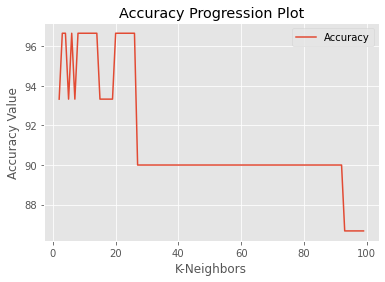

In [101]:
plt.plot(predictions[:,0], predictions[:,1], label = "Accuracy")
plt.xlabel("K-Neighbors")
plt.ylabel("Accuracy Value")
plt.title("Accuracy Progression Plot")
plt.legend()
plt.show()

In [1]:
!start .